In [280]:
import matplotlib as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import pandas as pd
from pylab import rcParams
import seaborn as sb
from collections import Counter
import statsmodels.formula.api as smapi
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [178]:
mydataset = "Documents\\patients.csv"
patients = pd.read_csv(mydataset)



In [179]:
patients.head()

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119


In [165]:
patients.shape

(100, 10)

In [180]:
patients.loc[:, ['Age', 'Gender', 'Height', 'Weight', 'Smoker', 'Location', 'SelfAssessedHealthStatus']]

,Age,Gender,Height,Weight,Smoker,Location,SelfAssessedHealthStatus
0,38,'Male',71,176,1,'County General Hospital','Excellent'
1,43,'Male',69,163,0,'VA Hospital','Fair'
2,38,'Female',64,131,0,'St. Mary's Medical Center','Good'
3,40,'Female',67,133,0,'VA Hospital','Fair'
4,49,'Female',64,119,0,'County General Hospital','Good'
5,46,'Female',68,142,0,'St. Mary's Medical Center','Good'
6,33,'Female',64,142,1,'VA Hospital','Good'
7,40,'Male',68,180,0,'VA Hospital','Good'
8,28,'Male',68,183,0,'St. Mary's Medical Center','Excellent'
9,31,'Female',66,132,0,'County General Hospital','Excellent'


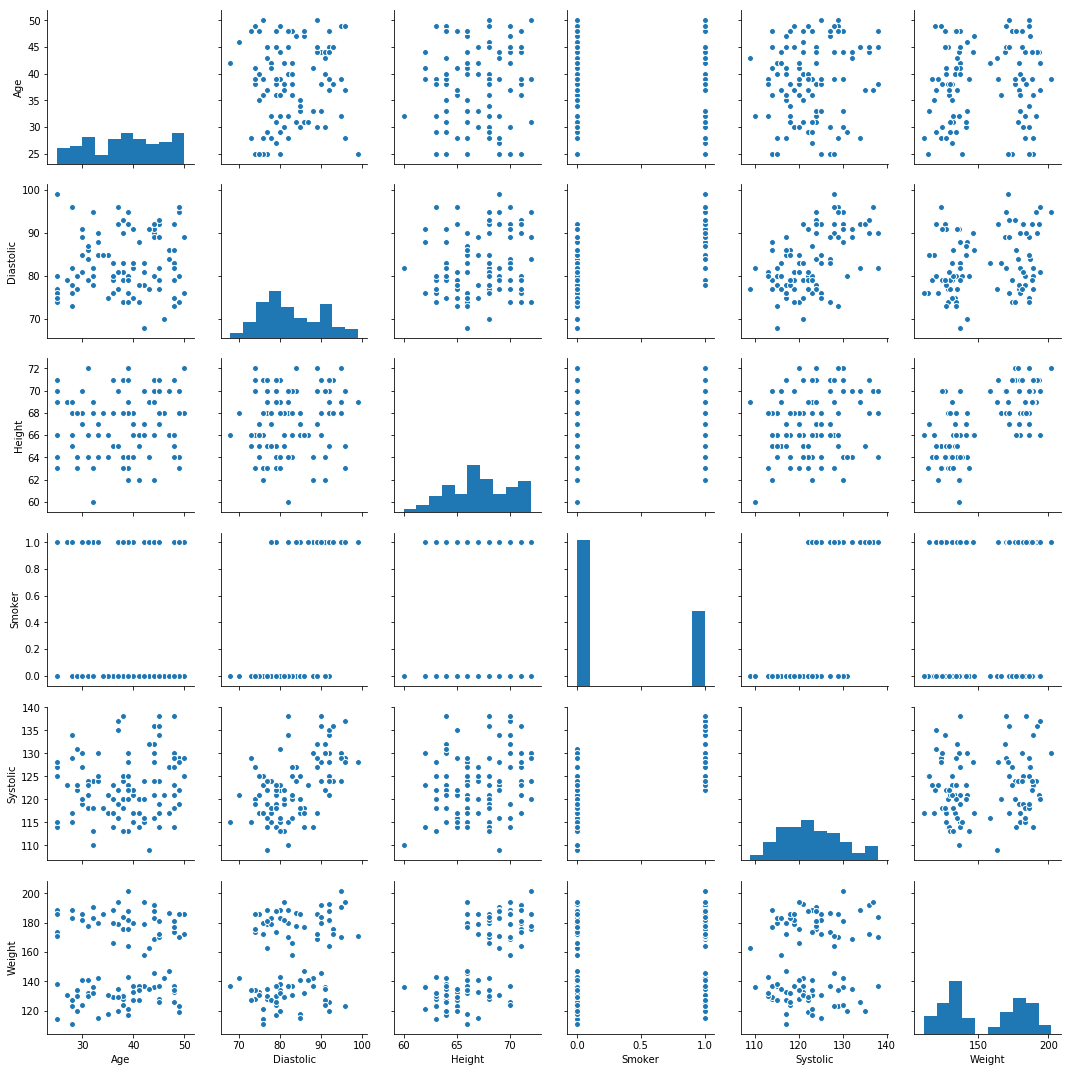

In [284]:
sb.pairplot(patients)

In [286]:
lm = smapi.ols(formula = "Systolic~Age+Gender+Height+Weight+Smoker+Location+SelfAssessedHealthStatus", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Systolic   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     11.19
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           3.89e-12
Time:                        01:05:50   Log-Likelihood:                -291.09
No. Observations:                 100   AIC:                             604.2
Df Residuals:                      89   BIC:                             632.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  88.6581     18.225      4.865      0.000      52.446     124.870
Gender[T.'Male']                           -1.4794      3.266     -0.453      0.652      -7.968       5.010
Location[T.'St. Mary's Medical Center']    -0.8565      1.298     -0.660      0.511      -3.436       1.723
Location[T.'VA Hospital']                  -1.7348      1.133     -1.531      0.129      -3.987       0.517
SelfAssessedHealthStatus[T.'Fair']         -2.7510      1.511     -1.821      0.072      -5.753       0.251
SelfAssessedHealthStatus[T.'Good']          0.5864      1.178      0.498      0.620      -1.755       2.928
SelfAssessedHealthStatus[T.'Poor']          0.4593      1.676      0.274      0.785      -2.871       3.790
Age                                         0.0803      0.067      1.198      0.234      -0.053       0.213
Height                                      0.4696      0.254      1.850      0.068      -0.035       0.974
Weight                                     -0.0134      0.058     -0.230      0.819      -0.129       0.103
Smoker                                      9.6731      1.046      9.249      0.000       7.595      11.751
==============================================================================
Omnibus:                        3.710   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.723
Skew:                           0.451   Prob(JB):                        0.155
Kurtosis:                       2.718   Cond. No.                     6.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

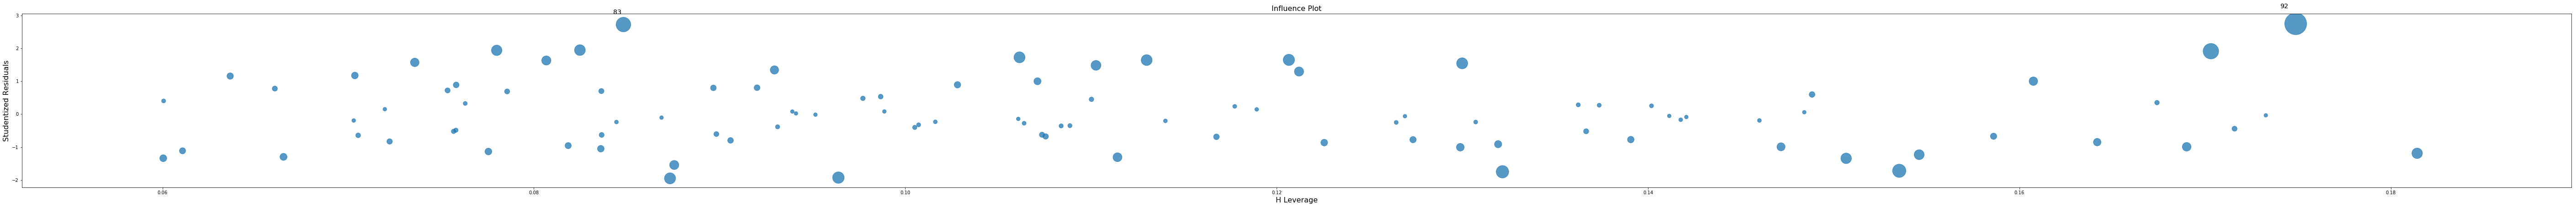

In [287]:
fig, ax = plt.subplots(figsize=(100,7))
fig = sm.graphics.influence_plot(lm, ax=ax, criterion="cooks")
